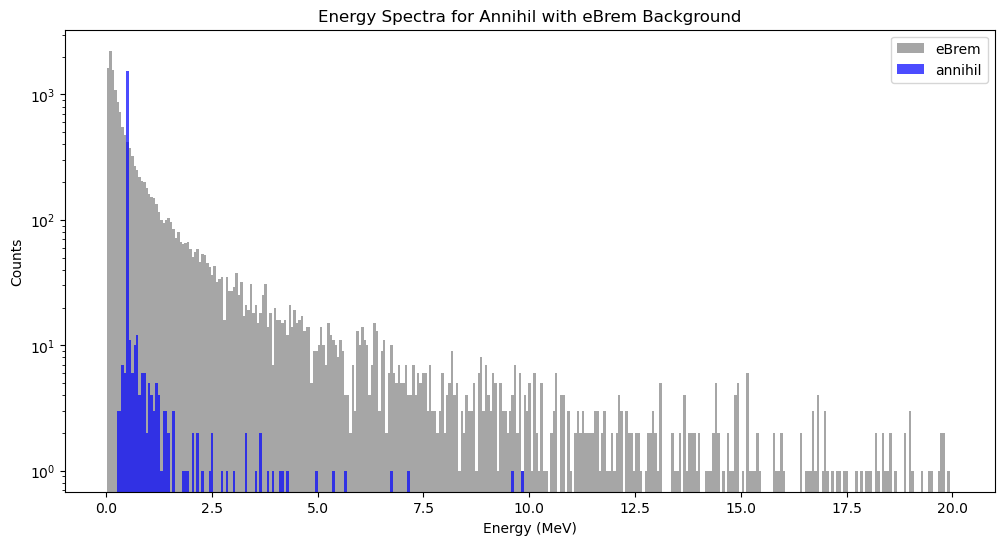

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


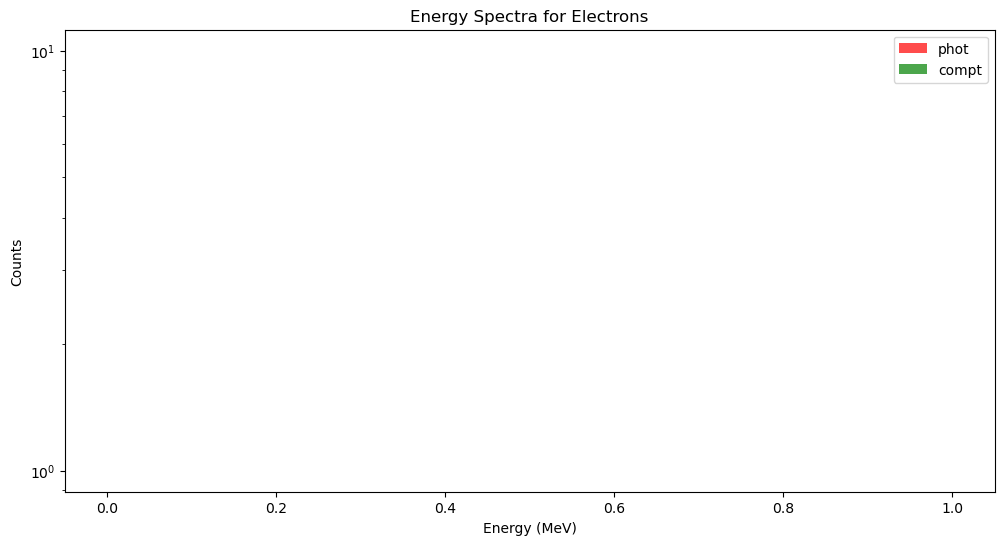

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

# Open the ROOT file and get the TTree
file = uproot.open("dati/compton/Hits.root")
tree = file["Hits"]

# Get the data as a Pandas DataFrame
data = tree.arrays(library="pd")

# Define the processes of interest
process_names = ["annihil", "eBrem","phot","compt"]

# Create dictionaries to store data for these processes
process_energy_spectra = {}
process_positions = {}
process_TOF = {}

# Initialize background data for eBrem
background_energy = None
background_positions = None
background_TOF = {}

for process_name in process_names:
    process_data = data[data["processName"] == process_name]

    process_data=process_data[process_data["particleName"]=="gamma"]
    energies = process_data["energy"]
    positions=(process_data["z"])/(process_data["y"])
    TOF = process_data["TOF"]

    if process_name == "eBrem":
        # Store eBrem data as background
        background_energy = energies
        background_positions = positions
        background_TOF = TOF

    if process_name=="annihil":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
    

        


# Plot energy spectra for eBrem as background
min_value = min(background_energy.min(), process_energy_spectra["annihil"].min())
#max_value = max(background_energy.max(), process_energy_spectra["annihil"].max())

max_value = 20

num_bins = 350  # Adjust as needed
bin_edges = np.linspace(min_value, max_value, num=num_bins)

plt.figure(figsize=(12, 6))
plt.yscale('log')
if background_energy is not None:
    plt.hist(background_energy, bins=bin_edges, label="eBrem", alpha=0.7,  color="gray",range=(0, 20)) 
    #plt.hist(process_energy_spectra["phot"], bins=100, label="phot", alpha=0.7,  color="red")
    #plt.hist(process_energy_spectra["compt"], bins=100, label="compt", alpha=0.7,  color="green")

       
if "annihil" in process_energy_spectra:
    plt.hist(process_energy_spectra["annihil"], bins=bin_edges, label="annihil", alpha=0.7, color="blue",range=(0, 20))
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("Energy Spectra for Annihil with eBrem Background")
plt.legend()
plt.show()



for process_name in process_names:
    process_data = data[data["processName"] == process_name]

    process_data=process_data[process_data["particleName"]=="e-"]
    energies = process_data["energy"]
    positions=(process_data["z"])/(process_data["y"])
    TOF = process_data["TOF"]

    
    if process_name=="phot":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
        
    if process_name=="compt":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
        
        
        
plt.figure(figsize=(12, 6))
plt.yscale('log')

plt.hist(process_energy_spectra["phot"], bins=100, label="phot", alpha=0.7,  color="red")
plt.hist(process_energy_spectra["compt"], bins=100, label="compt", alpha=0.7,  color="green")


plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("Energy Spectra for Electrons")
plt.legend()
plt.show()


# Plot cylindrical positions for eBrem as background
#if background_positions is not None:
#    plt.hist(background_positions, bins=60, label="eBrem", alpha=0.7, color="gray",range=(-3, 3))
#if "annihil" in process_positions:
#    plt.hist(process_positions["annihil"], bins=60, label="annihil", alpha=0.7, color="blue",range=(-3, 3))
#plt.xlabel("Cylindrical Position (mm)")
#plt.ylabel("Counts")
#plt.title("Cylindrical Position for Annihil with eBrem Background")
#plt.legend()
#
#plt.tight_layout()
#plt.show()
#
## Perform TOF analysis for annihil and eBrem
#if background_TOF is not None:
#    plt.hist(background_TOF, bins=100, label="eBrem", alpha=0.7, color="gray")
#
#
#if "annihil" in process_TOF:
#    plt.hist(process_TOF["annihil"], bins=100, label="annihil", alpha=0.7, range=(0, 10))
#    plt.xlabel("Time of Flight (ns)")
#    plt.ylabel("Counts")
#    plt.title("Time of Flight for Annihil and eBrem")
#    plt.legend()
#
#plt.show()

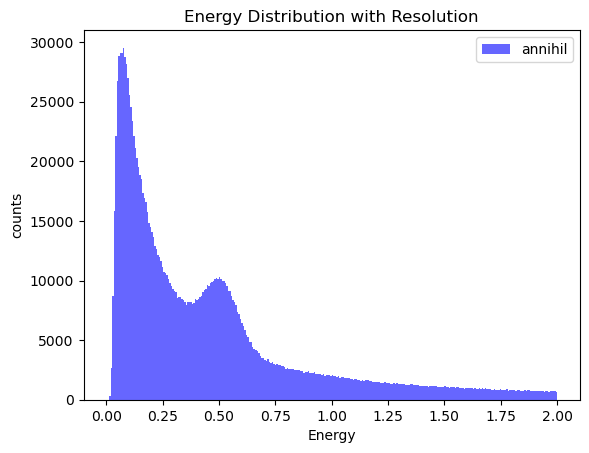

In [3]:
perfect_energies = data["energy"]

# Parameters for the energy resolution Gaussian distribution
mean_resolution = 0  # Mean of the resolution
std_resolution = 0.15  # Standard deviation of the resolution (adjust as needed)

# Create an array of energies with energy resolution
energies_with_resolution = np.concatenate([np.random.normal(energy, std_resolution*energy,size=100) for energy in perfect_energies])

# Plot the histogram
plt.hist(energies_with_resolution, bins=300, density=False, alpha=0.6, color='blue', label='annihil',range=(0,2))
plt.xlabel('Energy')
plt.ylabel('counts')
plt.title('Energy Distribution with Resolution')
plt.legend()
plt.show()

In [4]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = uproot.open("dati/Collimazione/fourth/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

annihil_data = data[data["processName"] == "annihil"]
brems_data = data[data["processName"] == "eBrem"]
#brems_data = brems_data[brems_data["energy"] >= 0.4]
#brems_data = brems_data[brems_data["energy"] <= 0.6]

# Group the filtered data by event and parentID, then count occurrences
grouped_data = annihil_data.groupby(["evt", "parentID"]).size().reset_index(name="count")

grouped_data_brem = brems_data.groupby(["evt"]).size().reset_index(name="count")

print(grouped_data.head())

bins = [0.999, 1.09, 1.9999,2.09,2.9999, 3.09]

#plt.hist(grouped_data_brem["count"], bins=bins, label="brem", alpha=0.7, color="red")
plt.hist(grouped_data["count"], bins=bins, label="annihil", alpha=0.7, color="blue")
plt.show()

print(np.shape(grouped_data[grouped_data["count"]==2])[0])

print(np.shape(grouped_data_brem)[0])

x=[0]
plt.scatter(x,np.shape(grouped_data[grouped_data["count"]==2])[0],label="annihil_pair")
plt.scatter(x,np.shape(grouped_data_brem)[0],label="brem")
plt.legend()

FileNotFoundError: file not found

    'dati/Collimazione/fourth/Hits.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.
